In [175]:
import copy
import warnings 
import numpy   as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [176]:
data = pd.read_csv('datasets/HousePricePrediction/data.csv',sep=',')

In [177]:
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


&nbsp;

## Analise dos dados

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [179]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


> Features passaram por normalização|padronização

In [180]:
data.isna().nunique()

date             1
price            1
bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
street           1
city             1
statezip         1
country          1
dtype: int64

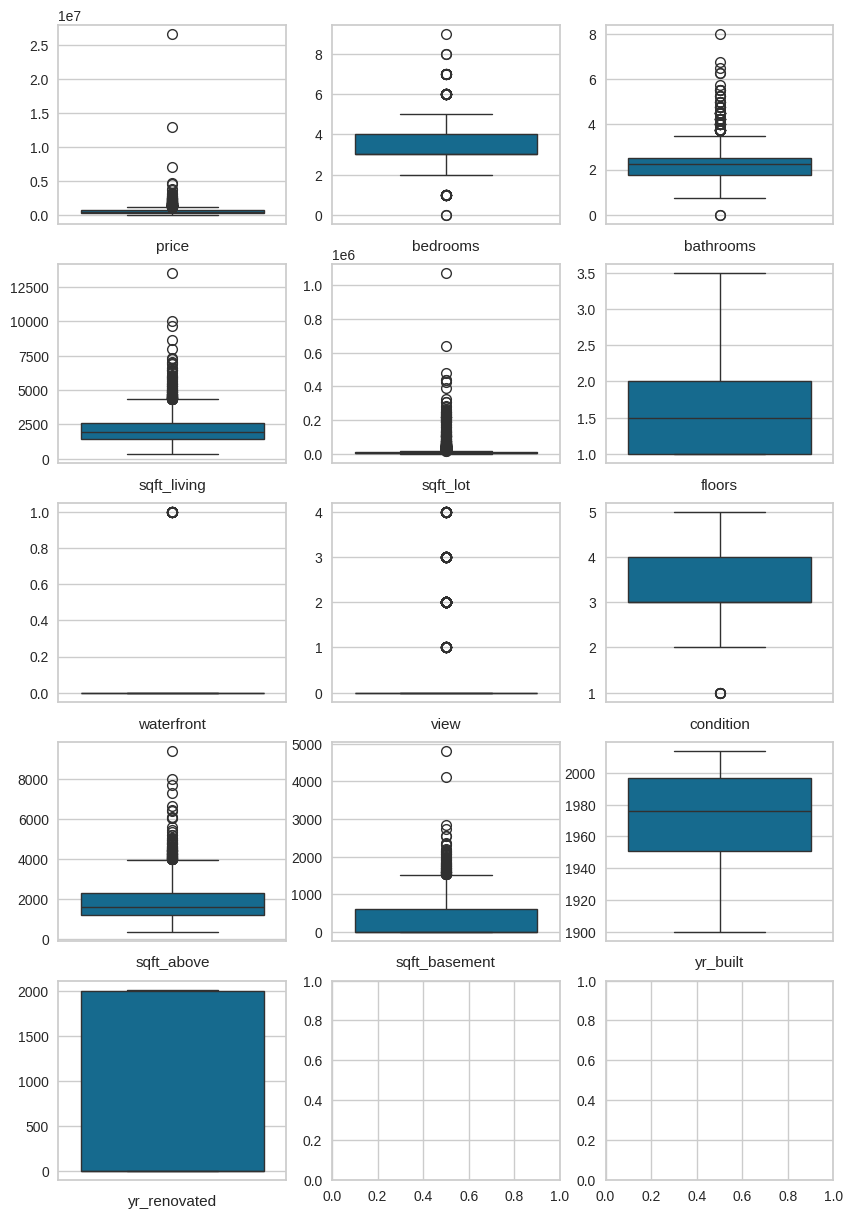

In [181]:
box = data.select_dtypes(exclude=['object'])

fig , ax  = plt.subplots(5,3,figsize=(10,15))
columns   = box.columns
for coluna, axis in zip(columns,ax.flatten()):
    sea.boxplot(box[coluna],ax=axis)
    axis.set_ylabel('')
    axis.set_xlabel(coluna)

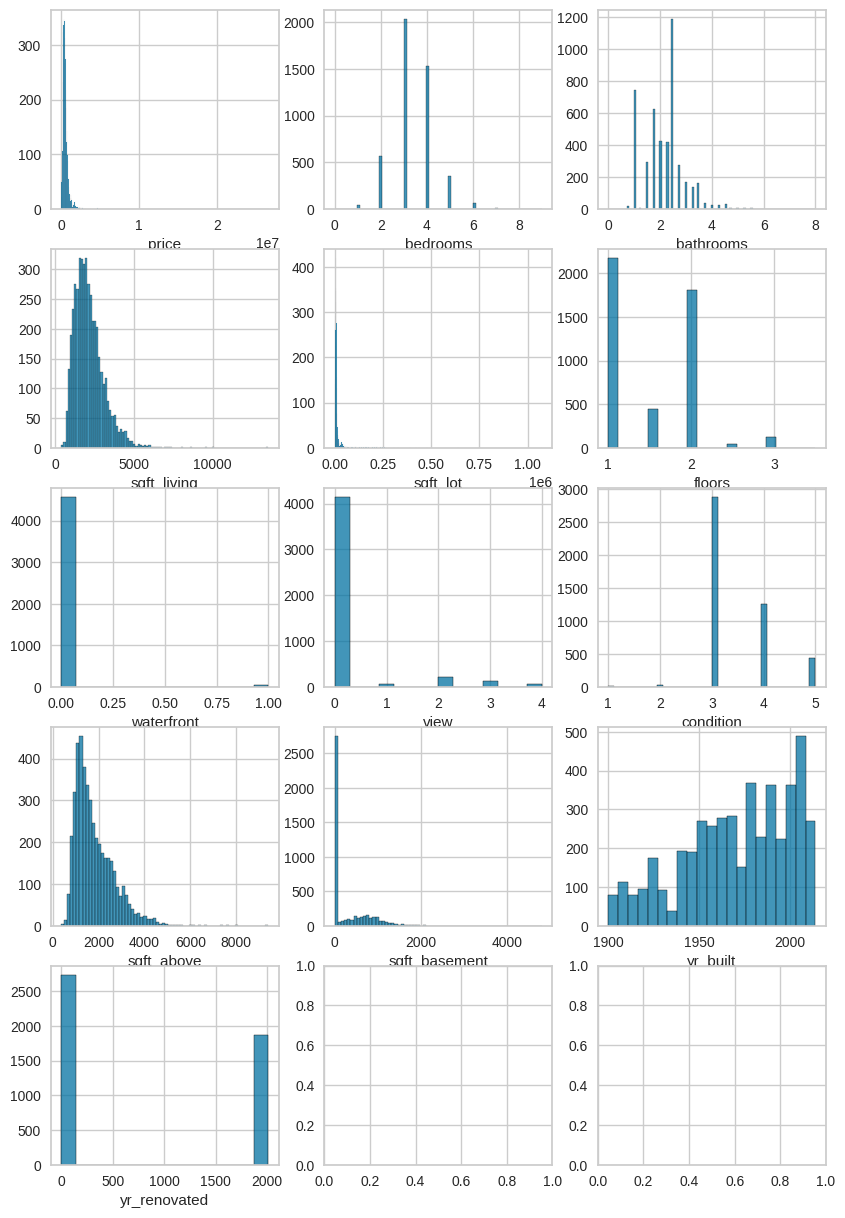

In [182]:
box = data.select_dtypes(exclude=['object'])

fig , ax  = plt.subplots(5,3,figsize=(10,15))
columns   = box.columns
for coluna, axis in zip(columns,ax.flatten()):
    sea.histplot(box[coluna],ax=axis)
    axis.set_ylabel('')
    axis.set_xlabel(coluna)

In [183]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

> atributos `country` , `street` são daddos redundates
* `country` = quantidade de valores unicos 1 (data.shape = (4600))
* `street`  = quantidade de valores unicos 4525 (data.......(4600)) não tem como agrupar esses dados e ver se a relação de preço e rua 

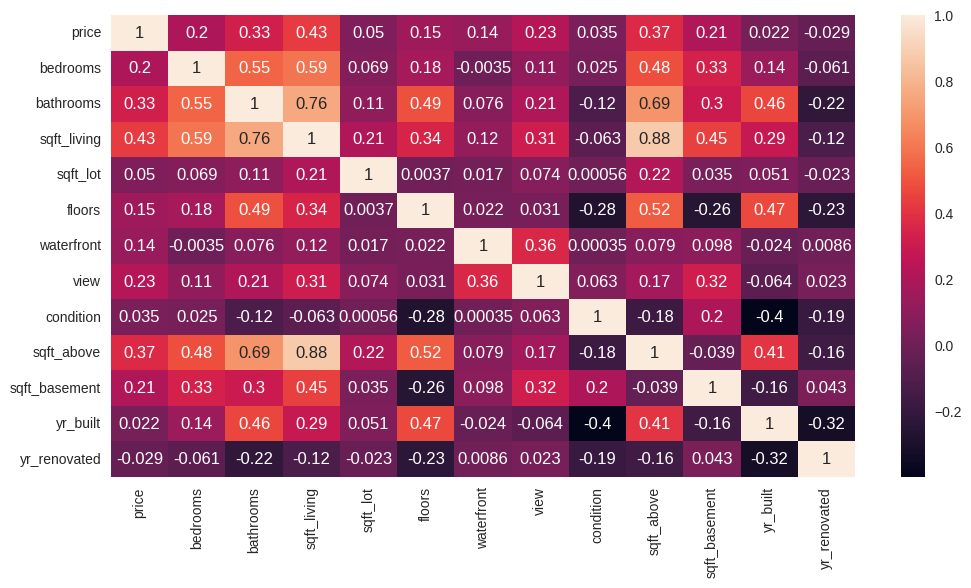

In [184]:
plt.figure(figsize=(12,6))
sea.heatmap(data.select_dtypes(exclude='object').corr(),annot=True)
plt.show()

&nbsp;

## Pré-processamento

In [185]:
from sklearn.base          import BaseEstimator,TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

In [186]:
class RemovendoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X.drop(columns=self.columns,axis=0)

In [187]:
class CriandoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.columns = ['date','yr_built','yr_renovated']

    def fit(self,X,y=None):
        return self
    
    def transform(self,X:pd.DataFrame,y=None):

        X[self.columns[0]] = pd.to_datetime(X[self.columns[0]])
        X['YearHouse' ] = X[self.columns[0]].dt.year - abs( X[self.columns[1]] )
        return X

In [188]:
class TransformancaoLogaritma(BaseEstimator,TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self,X,y=None):
        return self
    
    def transform(self,X:pd.DataFrame,y=None):
        X = X.drop(index=X.loc[X['price']==0].index,axis=1) 
        X['price'] = np.log10(X['price'])
        return X

In [189]:
class TransformandoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list|str):
        self.columns = columns

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        if (type(self.columns) == list):
            X[self.columns] = LabelEncoder().fit_transform(X[self.columns])
        else:
            X[self.columns] = LabelEncoder().fit_transform(X[self.columns].values)
        return X   

In [190]:
class Padronizacao(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):  
        if ( type(self.columns) == list ):
            X[self.columns]   = StandardScaler().fit_transform(X[self.columns])
        else:
            X[[self.columns]] = StandardScaler().fit_transform(X[[self.columns]])
        return X

In [191]:
class Teto(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):
        X[self.columns] = np.floor(X[self.columns].values)
        return X

In [192]:
class Dummies(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):
        return pd.get_dummies(X,columns=self.columns,dtype=int)

&nbsp;

## Previsão

In [193]:
train = pd.read_csv('datasets/HousePricePrediction/data.csv')
test  = pd.read_csv('datasets/HousePricePrediction/output.csv')

In [194]:
from sklearn.metrics      import *
from sklearn.pipeline     import Pipeline
from sklearn.linear_model import SGDRegressor,LinearRegression,Ridge
from sklearn.svm          import SVR
from sklearn.base         import clone
from sklearn.model_selection import (
    train_test_split,
    cross_val_score ,
    GroupKFold      ,
    GridSearchCV    ,
    KFold
)

In [195]:
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor       import PredictionError

In [196]:
pipeline = Pipeline(
    steps=[
        ('CriandoAtributos'   ,CriandoAtributos()),
        ('Removendo preço'    ,TransformancaoLogaritma()),
        ('Padronização'       ,Padronizacao(['sqft_living','sqft_lot','floors','sqft_above','sqft_basement','YearHouse','yr_renovated'])),
        ('RemovendoAtributos' ,RemovendoAtributos(['country', 'street','statezip','date','yr_built'])),
        #('LabelEncoder '      ,TransformandoAtributos('city')),
        ('Teto'               ,Teto('bathrooms')),
        ('Dummies'            ,Dummies(['bedrooms','bathrooms','waterfront','view','condition','city']))
        ]
)

In [197]:
dataset = pd.concat([train,test],axis=0)
dataset = pipeline.fit_transform(dataset)

In [198]:
X = dataset.drop(columns='price',axis=0)
Y = dataset['price']

In [199]:
xtrain , xtest , ytrain , ytest = train_test_split(X,Y,test_size=2202,random_state=42)

In [200]:
xtest.shape,xtrain.shape

((2202, 81), (6900, 81))

&nbsp;

### Gradiente descendente estocastico regressor

In [201]:
regSGB = SGDRegressor()
regSGB.fit(xtrain,ytrain)

SGDRegressor()

In [202]:
predSGB = regSGB.predict(xtest)

In [203]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predSGB))
print("Mean Squared error...:",mean_squared_error(ytest,predSGB))
print("r2 score.............:",r2_score(ytest,predSGB))

Mean Absolute error..: 0.0972314292279656
Mean Squared error...: 0.022903632505579096
r2 score.............: 0.5807819669909527


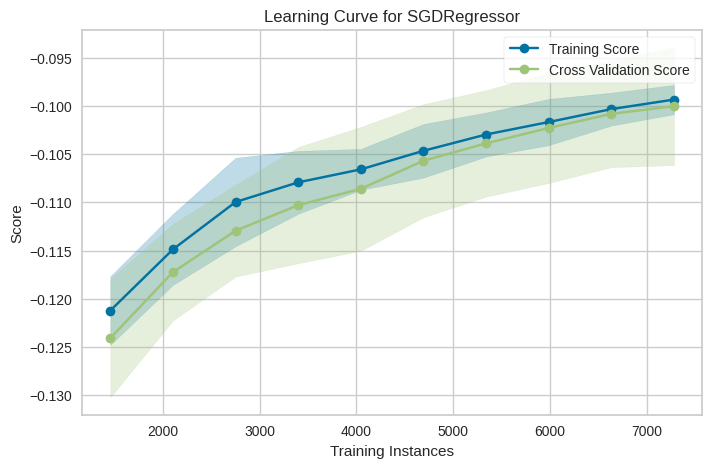

In [204]:
plt.figure(figsize=(8,5))
learning = LearningCurve(regSGB,scoring='neg_mean_absolute_error',train_sizes=np.linspace(0.2,1,10))
learning.fit(X,Y)
learning.show()
plt.show()

In [205]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(regSGB)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]
    
    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = mean_squared_error(ytestkf,predfold)
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f}')
    index+=1

Fold 1 | mean_squared_error : 0.02284 | mean_absolute_error: 0.096053
Fold 2 | mean_squared_error : 0.02521 | mean_absolute_error: 0.099922
Fold 3 | mean_squared_error : 0.02320 | mean_absolute_error: 0.099458
Fold 4 | mean_squared_error : 0.02333 | mean_absolute_error: 0.097499
Fold 5 | mean_squared_error : 0.03198 | mean_absolute_error: 0.106088


In [206]:
scores =cross_val_score(clone(regSGB),X,Y,cv=kfold,scoring='r2')
print('cross_val_score........:',scores)
print('cross_val_score_mean...:',scores.mean())

cross_val_score........: [0.56375446 0.54260343 0.57890691 0.5781013  0.45324104]
cross_val_score_mean...: 0.5433214254791358


&nbsp;

### Regressão Linear

In [207]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [208]:
pred = reg.predict(xtest)

In [209]:
print("Mean Absolute error..:",mean_absolute_error(ytest,pred))
print("Mean Squared error...:",mean_squared_error(ytest,pred))
print("r2 score.............:",r2_score(ytest,pred))

Mean Absolute error..: 0.08325836010697218
Mean Squared error...: 0.016171567186196778
r2 score.............: 0.7040027347269187


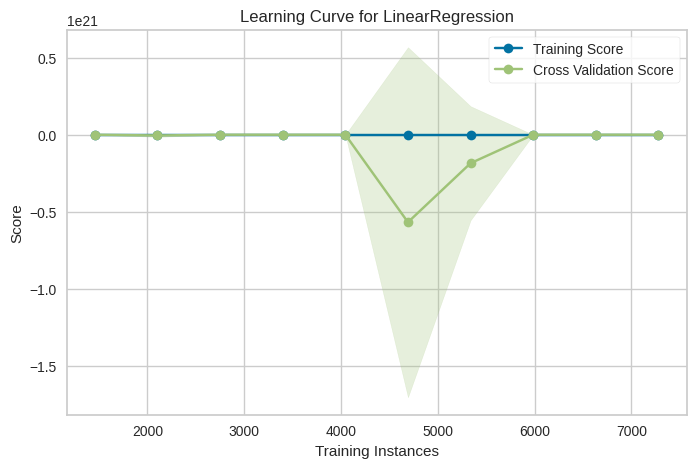

In [210]:
plt.figure(figsize=(8,5))
learning = LearningCurve(reg,scoring='neg_mean_squared_error',train_sizes=np.linspace(0.2,1,10))
learning.fit(X,Y)
learning.show()
plt.show()

In [211]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(reg)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]
    
    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = mean_squared_error(ytestkf,predfold)
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f}')
    index+=1

Fold 1 | mean_squared_error : 0.01603 | mean_absolute_error: 0.084221
Fold 2 | mean_squared_error : 0.01456 | mean_absolute_error: 0.080710
Fold 3 | mean_squared_error : 748568683945578.37500 | mean_absolute_error: 906974.696714
Fold 4 | mean_squared_error : 0.01489 | mean_absolute_error: 0.082979
Fold 5 | mean_squared_error : 0.01776 | mean_absolute_error: 0.085599


In [212]:
scores =cross_val_score(clone(reg),X,Y,cv=kfold,scoring='r2')
print('cross_val_score.......:',scores)
print('cross_val_score_mean..:',scores.mean())

cross_val_score.......: [ 6.99385490e-01  7.36823927e-01 -1.38491955e+16  7.34886161e-01
  6.98213060e-01]
cross_val_score_mean..: -2769839100181839.0


&nbsp;

### SVM 

In [213]:
svmr = SVR(kernel='poly',degree=2,coef0=10)
svmr.fit(xtrain,ytrain)

SVR(coef0=10, degree=2, kernel='poly')

In [214]:
predSVMR = svmr.predict(xtest)

In [215]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predSVMR))
print("Mean Squared error...:",mean_squared_error(ytest,predSVMR))
print("r2 score.............:",r2_score(ytest,predSVMR))

Mean Absolute error..: 0.07840003214617952
Mean Squared error...: 0.014048954052005432
r2 score.............: 0.7428541135524437


In [223]:
scores =cross_val_score(clone(svmr),X,Y,cv=kfold,scoring='r2')
print('cross_val_score.......:',scores)
print('cross_val_score_mean..:',scores.mean())

cross_val_score.......: [0.74109645 0.77041963 0.76676138 0.75733975 0.72161956]
cross_val_score_mean..: 0.7514473543010645


&nbsp;

### Ridge

In [217]:
ridge = Ridge(alpha=0.1,solver='sparse_cg')
ridge.fit(xtrain,ytrain)

Ridge(alpha=0.1, solver='sparse_cg')

In [218]:
predRidge = ridge.predict(xtest)

In [219]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predRidge))
print("Mean Squared error...:",mean_squared_error(ytest,predRidge))
print("r2 score.............:",r2_score(ytest,predRidge))

Mean Absolute error..: 0.08328842238782422
Mean Squared error...: 0.016169245170448432
r2 score.............: 0.7040452358836412


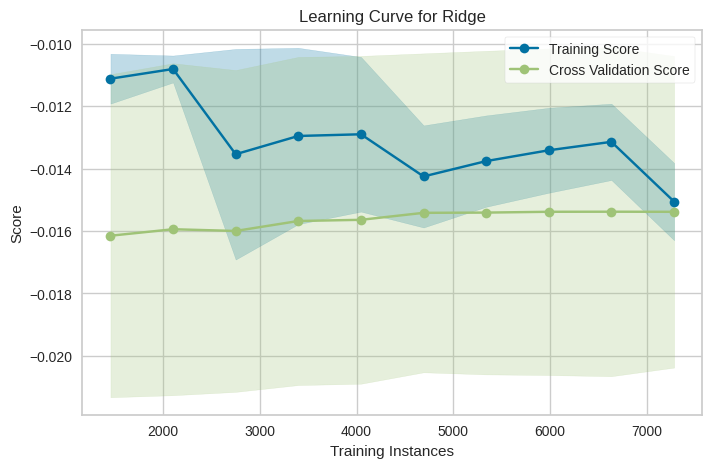

In [220]:
plt.figure(figsize=(8,5))
learning = LearningCurve(clone(ridge),scoring='neg_mean_squared_error',train_sizes=np.linspace(0.2,1,10))
learning.fit(X,Y)
learning.show()
plt.show()

In [221]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(ridge)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]
    
    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = mean_squared_error(ytestkf,predfold)
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.01603 | mean_absolute_error: 0.084239 | r2 : 0.6994944677169623
Fold 2 | mean_squared_error : 0.01430 | mean_absolute_error: 0.080444 | r2 : 0.7414377830489028
Fold 3 | mean_squared_error : 0.01471 | mean_absolute_error: 0.083392 | r2 : 0.7279259555228124
Fold 4 | mean_squared_error : 0.01488 | mean_absolute_error: 0.082984 | r2 : 0.7351407809516216
Fold 5 | mean_squared_error : 0.01776 | mean_absolute_error: 0.085650 | r2 : 0.6982045828622758


In [222]:
scores =cross_val_score(clone(ridge),X,Y,cv=kfold,scoring='r2')
print('cross_val_score.......:',scores)
print('cross_val_score_mean..:',scores.mean())

cross_val_score.......: [0.69949447 0.74143778 0.72792596 0.73514078 0.69820458]
cross_val_score_mean..: 0.7204407140205149
